## E-Commerce Analysis
E-commerce stores which became success stories were successful in targeting the desired customers. One of the techniques by which they were able to achieve this was customer segmentation i.e. by segmenting the existing customers based on frequency of purchases, monetary value etc. E-commerce stores who designed market strategies based on mass marketing soon realized the need of customer segmentation as an alternative to save cost and efforts in the digital sphere.

We have the Customer data of two years and we can perform the segmentation on the basis of Recency,Frequency and Monetary Approach to make the business decisions

************************************************************************************************************************

In [52]:
# Importing the Necessary Libraries

In [53]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Reading the dataset

In [55]:
dataset=pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [56]:
# Checking the missing values

In [57]:
dataset.isnull().sum()/len(dataset)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [58]:
dataset.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

**************************************************************************************************************************

The Approach that we have to use for segmentation is Recency Frequency and Monetary approach for which we need CustomerID for segmentation, Date of Purchase for recency, Invoice number for Frequency and Price for Monetary we can drop the other columns in order to make the segmentation more clear

**************************************************************************************************************************

In [59]:
dataset=dataset.drop(['Item Code','Quantity',
       'Time', 'price per Unit','Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)
dataset.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


***************************************************************************************************************************

The majority of missing data is the customer ID which is an important feature for segmentation, As we cannot impute the customer ID with some random values we can drop the rows which has missing values

**************************************************************************************************************************

In [60]:
dataset=dataset.dropna()

In [61]:
dataset.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

***************************************************************************************************************************

While creating our model of grouping the customers we cannot have duplicate values as the model will get trained on any one of them and removing the duplicates will improve the efficiency of the segmentation

***********************************************************************************************************************

In [62]:
dataset.duplicated().sum()

1330

In [63]:
dataset=dataset.drop_duplicates(ignore_index=True)

In [64]:
dataset.duplicated().sum()

0

##### Correcting the name of the columns

In [65]:
dataset=dataset.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date'})
dataset.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


************************************************************************************************************************

The date feature in the dataset is of type string and the model will treat is as it is, in order to feed the model correct data we need to convert the column to datetime type for proper training

***************************************************************************************************************************

In [66]:
import datetime as dt

In [67]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [69]:
 dataset['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

*************************************************************************************************************************

In order to caluculate the Recency we need to check the last date and how long ago the customer has ordered will help us to understand who are the prime customers to be targetted for advertising or offers, As we see the last date here is 19th December 2017 so we will calculate the recency on the basis of next day that is 20th December 2017, Similarly the count of invoice per customer will give us their frequency and the sum of their ordered price will give us the monetary benefits

***************************************************************************************************************************

In [72]:
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [73]:
RFMScore=dataset.groupby('CustomerID').agg({'Date':lambda x:(latest_date-x.max()).days,
                                           'InvoiceNo':lambda x:x.count(),
                                           'Price':lambda x:x.sum()})

RFMScore.rename(columns={'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace=True)

In [28]:
RFMScore

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0
...,...,...,...
4368.0,17,10,20480.0
4369.0,181,7,10774.0
4370.0,12,13,24962.0


# SEGMENTATION

The approach we can use for segmentation can be quantile approcah where we can identify the customers falling in the 25,50 and 75 percentile and make decisions accordingly

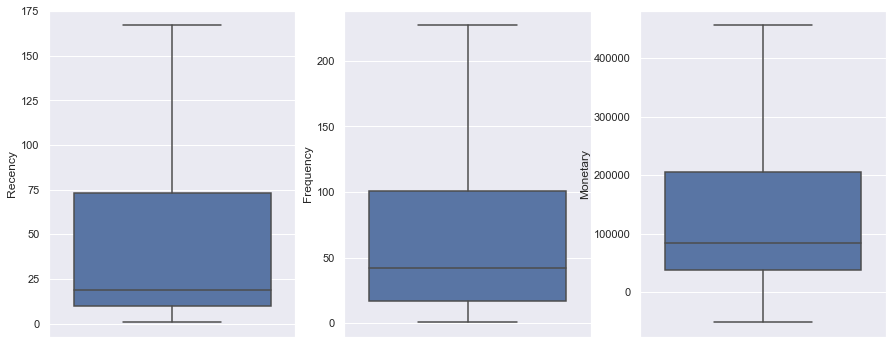

In [102]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y='Recency',data=RFMScore,showfliers=False)

plt.subplot(1,3,2)
sns.boxplot(y='Frequency',data=RFMScore,showfliers=False)

plt.subplot(1,3,3)
sns.boxplot(y='Monetary',data=RFMScore,showfliers=False)

plt.show()

***************************************************************************************************************************

## The segmentation approach that we need to apply is based on quantiles , Recency is better in the 25th percentile as the most recent customer is better, Frequency and monetary will be better as moving towards the 75th percentile and above, So writing a function to divide the best customers basis Recency, Frequency and Monetary Where 1 indicates the Best and 4 indicates Blacklisted

**************************************************************************************************************************

In [103]:
quantile=RFMScore.quantile(q=[0.25,0.50,0.75])
quantile=quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [104]:
def recency_score(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [106]:
RFMScore['R']=RFMScore['Recency'].apply(recency_score,args=('Recency',quantile))

In [108]:
def FnM_score(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [111]:
RFMScore['F']=RFMScore['Frequency'].apply(FnM_score,args=('Frequency',quantile))
RFMScore['M']=RFMScore['Monetary'].apply(FnM_score,args=('Monetary',quantile))

In [112]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


###### As the RFM scores are different summing them up which indicates the values 3 to 12 where 3 being the best and 12 the worst'

In [113]:
RFMScore['RFM_Score']=RFMScore[['R','F','M']].sum(axis=1)
RFMScore

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
2.0,4,181,550416.0,1,1,1,3
3.0,77,27,257404.0,4,3,1,8
4.0,20,72,176613.0,3,2,2,7
5.0,18,16,41976.0,2,4,3,9
6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...
4368.0,17,10,20480.0,2,4,4,10
4369.0,181,7,10774.0,4,4,4,12
4370.0,12,13,24962.0,2,4,4,10


### The values 3-12 were difficult to understand so doing further grouping by diving them into Platinum,Gold,Silver and Bronze

In [114]:
Loyal_customer=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(RFMScore.RFM_Score,q=4,labels=Loyal_customer)
RFMScore['Loyal_customer']=score_cuts.values
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,Silver
4,6.0,9,84,151822.0,1,2,2,5,Platinum
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,Silver
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,10,Silver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinum


# Visualisation

In [115]:
RFMScore=RFMScore.reset_index()

In [116]:
new_datapoint=RFMScore.groupby('Loyal_customer')[['Recency','Frequency','Monetary','CustomerID']].agg({
    'Recency':'sum','Frequency':'sum','Monetary':'sum','CustomerID':'nunique'}).reset_index()

In [117]:
# Renaming the column for better understanding
new_datapoint=new_datapoint.rename(columns={'CustomerID':'No_of_customers'})
new_datapoint

,Loyal_customer,Recency,Frequency,Monetary,No_of_customers
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


### As the customers are divided checking what percentage of the belong to the respective categories and dropping the columns which are not required now for visualisation

In [120]:
new_datapoint['Percentage']=round(new_datapoint['No_of_customers']/new_datapoint.No_of_customers.sum()*100,2)

In [121]:
new_datapoint

,Loyal_customer,Recency,Frequency,Monetary,No_of_customers,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [122]:
new_datapoint=new_datapoint.drop(['Recency','Frequency','Monetary'],axis=1)

In [123]:
new_datapoint

,Loyal_customer,No_of_customers,Percentage
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


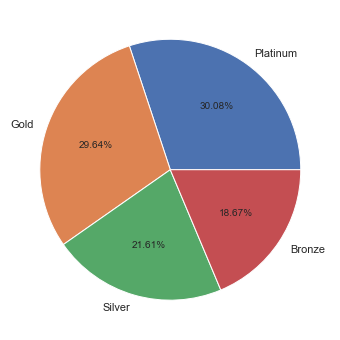

In [129]:
plt.figure(figsize=(15,6))
plt.pie(new_datapoint['Percentage'],labels=Loyal_customer,autopct='%1.2f%%')
plt.show()

************************************************************************************************************************

### As per our Observation we can see that most of our customers are in the Platinum Category, However a big number lies in Silver and Bronze Category so we can use this data to decide for which group of customers we should focus on advertising and for which group of customers we should give offers and try retension.

**************************************************************************************************************************

# Clustering

Building Unsupervise Machine Learning method - KMeans for which we require Recency, Frequency and Monetary variables

*************************************************************************************************************************

In [130]:
data=RFMScore.iloc[:,1:4]
data.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


##### The algorithm works works on Euclidean distance and the variables are in different units so we need to scale the data which to perform clustering

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data)
scaled_data=pd.DataFrame(data_sc,index=data.index,columns=data.columns)

In [133]:
scaled_data

,Recency,Frequency,Monetary
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


### Building Kmeans model

In [134]:
from sklearn.cluster import KMeans

***********************************************************************************************************************

We need to find how many clusters will be best suited for a proper segregation for which we are going to use within cluster sum of sqaures(WCSS) and Elbow method

**********************************************************************************************************************

In [136]:
wcss=[]
for i in range(1,15):
    KM=KMeans(n_clusters=i,init='k-means++',max_iter=1000,random_state=100)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [137]:
wcss

[13047.000000000015,
 9014.850261247648,
 5556.252595830581,
 4360.017640798178,
 3346.9322363867104,
 2481.078686464335,
 1978.9107061340096,
 1708.7125288993611,
 1496.7639789100108,
 1295.023832553824,
 1130.8924160115953,
 989.8243119951496,
 865.9881024011925,
 777.8202736917385]

<AxesSubplot:>

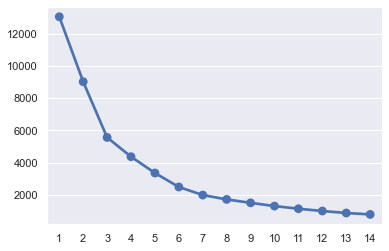

In [138]:
k_clusters=list(range(1,15))

sns.pointplot(k_clusters,wcss)

### As per the elbow method the optimal value for k could be 7 or 8 so lets make 7 clusters

In [170]:
KM=KMeans(n_clusters=7,init='k-means++',max_iter=1000,random_state=90)
y_kmeans=KM.fit_predict(scaled_data)

In [171]:
scaled_data['Cluster']=KM.labels_
scaled_data

,Recency,Frequency,Monetary,Cluster
0,-0.640796,0.383014,0.375097,0
1,0.173513,-0.284474,0.032622,0
2,-0.462317,-0.089428,-0.061808,0
3,-0.484627,-0.332151,-0.219173,0
4,-0.585021,-0.037416,-0.090784,0
...,...,...,...,...
4344,-0.495782,-0.358157,-0.244298,0
4345,1.333623,-0.371160,-0.255642,6
4346,-0.551556,-0.345154,-0.239059,0
4347,-0.640796,2.853587,0.058705,4


In [172]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, KM.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.821615936492014


### With 6 clusters we are getting the silhouette score of 0.82 which means our model is approximately 82% accurate